In [1]:
# Importing the required libraries
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Ignoring warnings and setting proper display options
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.expand_frame_repr',False)
pd.set_option('max_colwidth',None)

In [3]:
# Loading the datasets
df1 = pd.read_csv("IPL_Ball_by_Ball.csv")
df2 = pd.read_csv("IPL_Matches.csv")
# Merging the datasets into df
df = pd.merge(df1, df2, on="ID", how="left")

In [4]:
# Inspecting the first 2 rows of df
df.head(2)

,ID,Innings,Overs,BallNumber,Batter,Bowler,NonStriker,ExtraType,BatsmanRun,ExtrasRun,TotalRun,IsWicketDelivery,PlayerOut,Kind,FieldersInvolved,BattingTeam,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,WinningTeam,Margin,WonBy,Unnamed: 13,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,335982,1,0,1,SC Ganguly,P Kumar,BB McCullum,legbyes,0,1,1,0,NaN,NaN,NaN,Kolkata Knight Riders,Bangalore,18/04/2008,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,runs,NaN,['BB McCullum'],"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis', 'CL White', 'MV Boucher', 'B Akhil', 'AA Noffke', 'P Kumar', 'Z Khan', 'SB Joshi']","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Mohammad Hafeez', 'LR Shukla', 'WP Saha', 'AB Agarkar', 'AB Dinda', 'M Kartik', 'I Sharma']",Asad Rauf,RE Koertzen
1,335982,1,0,2,BB McCullum,P Kumar,SC Ganguly,NaN,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders,Bangalore,18/04/2008,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,runs,NaN,['BB McCullum'],"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis', 'CL White', 'MV Boucher', 'B Akhil', 'AA Noffke', 'P Kumar', 'Z Khan', 'SB Joshi']","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Mohammad Hafeez', 'LR Shukla', 'WP Saha', 'AB Agarkar', 'AB Dinda', 'M Kartik', 'I Sharma']",Asad Rauf,RE Koertzen


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 34 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   ID                260920 non-null  int64 
 1   Innings           260920 non-null  int64 
 2   Overs             260920 non-null  int64 
 3   BallNumber        260920 non-null  int64 
 4   Batter            260920 non-null  object
 5   Bowler            260920 non-null  object
 6   NonStriker        260920 non-null  object
 7   ExtraType         14125 non-null   object
 8   BatsmanRun        260920 non-null  int64 
 9   ExtrasRun         260920 non-null  int64 
 10  TotalRun          260920 non-null  int64 
 11  IsWicketDelivery  260920 non-null  int64 
 12  PlayerOut         12950 non-null   object
 13  Kind              12950 non-null   object
 14  FieldersInvolved  9354 non-null    object
 15  BattingTeam       260920 non-null  object
 16  City              248523 non-null  obj

In [6]:
len(df)

260920

In [7]:
# Extracting all the columns
df.columns

Index(['ID', 'Innings', 'Overs', 'BallNumber', 'Batter', 'Bowler',
       'NonStriker', 'ExtraType', 'BatsmanRun', 'ExtrasRun', 'TotalRun',
       'IsWicketDelivery', 'PlayerOut', 'Kind', 'FieldersInvolved',
       'BattingTeam', 'City', 'Date', 'Season', 'MatchNumber', 'Team1',
       'Team2', 'Venue', 'TossWinner', 'TossDecision', 'WinningTeam', 'Margin',
       'WonBy', 'Unnamed: 13', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2'],
      dtype='object')

In [8]:
# Creating a copy of df

In [9]:
dfc1 = df

In [10]:
# Dropping unnecessary columns

In [11]:
dfc1.drop(columns = ['Unnamed: 13', 'Team1Players','Team2Players', 'Umpire1', 'Umpire2'], axis = 1, inplace = True)

In [12]:
# Inspecting the first 5 rows for changes
dfc1.head()

,ID,Innings,Overs,BallNumber,Batter,Bowler,NonStriker,ExtraType,BatsmanRun,ExtrasRun,TotalRun,IsWicketDelivery,PlayerOut,Kind,FieldersInvolved,BattingTeam,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,WinningTeam,Margin,WonBy,Player_of_Match
0,335982,1,0,1,SC Ganguly,P Kumar,BB McCullum,legbyes,0,1,1,0,NaN,NaN,NaN,Kolkata Knight Riders,Bangalore,18/04/2008,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,runs,['BB McCullum']
1,335982,1,0,2,BB McCullum,P Kumar,SC Ganguly,NaN,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders,Bangalore,18/04/2008,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,runs,['BB McCullum']
2,335982,1,0,3,BB McCullum,P Kumar,SC Ganguly,wides,0,1,1,0,NaN,NaN,NaN,Kolkata Knight Riders,Bangalore,18/04/2008,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,runs,['BB McCullum']
3,335982,1,0,4,BB McCullum,P Kumar,SC Ganguly,NaN,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders,Bangalore,18/04/2008,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,runs,['BB McCullum']
4,335982,1,0,5,BB McCullum,P Kumar,SC Ganguly,NaN,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders,Bangalore,18/04/2008,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,runs,['BB McCullum']


In [13]:
# Changing the datatype of 'Overs' and 'BallNumber' from int to str for performing concat operation
dfc1['Overs'] = dfc1['Overs'].astype(str)
dfc1['BallNumber'] = dfc1['BallNumber'].astype(str)

In [14]:
# checking the data type of the columns of dfc1
dfc1.dtypes

ID                   int64
Innings              int64
Overs               object
BallNumber          object
Batter              object
Bowler              object
NonStriker          object
ExtraType           object
BatsmanRun           int64
ExtrasRun            int64
TotalRun             int64
IsWicketDelivery     int64
PlayerOut           object
Kind                object
FieldersInvolved    object
BattingTeam         object
City                object
Date                object
Season              object
MatchNumber         object
Team1               object
Team2               object
Venue               object
TossWinner          object
TossDecision        object
WinningTeam         object
Margin               int64
WonBy               object
Player_of_Match     object
dtype: object

In [15]:
# Creating a new column 'ball' by concatenating Overs and BallNumber
dfc1['ball'] = dfc1['Overs'] + '.' + dfc1['BallNumber']

In [16]:
# Creating a new column for Bowling Team
dfc1['BowlingTeam'] = dfc1.apply(lambda row : row['Team1'] if row['BattingTeam'] == row['Team2'] else row['Team2'], axis = 1)

In [17]:
# Inspecting for changes
dfc1.head()

,ID,Innings,Overs,BallNumber,Batter,Bowler,NonStriker,ExtraType,BatsmanRun,ExtrasRun,TotalRun,IsWicketDelivery,PlayerOut,Kind,FieldersInvolved,BattingTeam,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,WinningTeam,Margin,WonBy,Player_of_Match,ball,BowlingTeam
0,335982,1,0,1,SC Ganguly,P Kumar,BB McCullum,legbyes,0,1,1,0,NaN,NaN,NaN,Kolkata Knight Riders,Bangalore,18/04/2008,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,runs,['BB McCullum'],0.1,Royal Challengers Bangalore
1,335982,1,0,2,BB McCullum,P Kumar,SC Ganguly,NaN,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders,Bangalore,18/04/2008,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,runs,['BB McCullum'],0.2,Royal Challengers Bangalore
2,335982,1,0,3,BB McCullum,P Kumar,SC Ganguly,wides,0,1,1,0,NaN,NaN,NaN,Kolkata Knight Riders,Bangalore,18/04/2008,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,runs,['BB McCullum'],0.3,Royal Challengers Bangalore
3,335982,1,0,4,BB McCullum,P Kumar,SC Ganguly,NaN,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders,Bangalore,18/04/2008,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,runs,['BB McCullum'],0.4,Royal Challengers Bangalore
4,335982,1,0,5,BB McCullum,P Kumar,SC Ganguly,NaN,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders,Bangalore,18/04/2008,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,Kolkata Knight Riders,140,runs,['BB McCullum'],0.5,Royal Challengers Bangalore


In [18]:
# reconverting the datatypes of the columns 'Overs', 'BallNumber', 'ball' from str to int for mathematical operations
dfc1['Overs'] = dfc1['Overs'].astype(int)
dfc1['BallNumber'] = dfc1['BallNumber'].astype(int)
dfc1['ball'] = dfc1['ball'].astype(float)

In [19]:
# converting start_date to datetime
dfc1['Date'] = pd.to_datetime(dfc1['Date'])

In [20]:
# cheking the datatypes of all the columns of dfc1
dfc1.dtypes

ID                           int64
Innings                      int64
Overs                        int32
BallNumber                   int32
Batter                      object
Bowler                      object
NonStriker                  object
ExtraType                   object
BatsmanRun                   int64
ExtrasRun                    int64
TotalRun                     int64
IsWicketDelivery             int64
PlayerOut                   object
Kind                        object
FieldersInvolved            object
BattingTeam                 object
City                        object
Date                datetime64[ns]
Season                      object
MatchNumber                 object
Team1                       object
Team2                       object
Venue                       object
TossWinner                  object
TossDecision                object
WinningTeam                 object
Margin                       int64
WonBy                       object
Player_of_Match     

In [21]:
# extracting year from Date
dfc1['Year'] = dfc1['Date'].dt.year

In [22]:
# Creating Chennai Super Kings dataframe

In [23]:
dfcsk = dfc1[dfc1['BattingTeam'] == 'Chennai Super Kings']

In [24]:
# Extracting the name of Mahendra Singh Dhoni as per the dataset

In [25]:
dfcsk.Batter.unique()

array(['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dhoni', 'SK Raina',
       'JDP Oram', 'S Badrinath', 'SP Fleming', 'S Vidyut', 'JA Morkel',
       'Joginder Sharma', 'MS Gony', 'M Muralitharan', 'M Ntini',
       'S Anirudha', 'CK Kapugedera', 'L Balaji', 'A Mukund',
       'A Flintoff', 'T Thushara', 'M Vijay', 'SB Jakati', 'GJ Bailey',
       'R Ashwin', 'JM Kemp', 'S Tyagi', 'KB Arun Karthik',
       'DE Bollinger', 'SB Styris', 'S Randiv', 'WP Saha', 'DJ Bravo',
       'F du Plessis', 'RA Jadeja', 'KMDN Kulasekara', 'B Laughlin',
       'AS Rajpoot', 'CH Morris', 'MM Sharma', 'DR Smith', 'BB McCullum',
       'M Manhas', 'DJ Hussey', 'P Negi', 'A Nehra', 'RG More',
       'SR Watson', 'AT Rayudu', 'KM Jadhav', 'DL Chahar',
       'Harbhajan Singh', 'MA Wood', 'Imran Tahir', 'SW Billings',
       'DR Shorey', 'SN Thakur', 'MJ Santner', 'SM Curran', 'RD Gaikwad',
       'N Jagadeesan', 'MM Ali', 'RV Uthappa', 'DP Conway', 'S Dube',
       'D Pretorius', 'CJ Jordan', 'Mukesh Choudh

In [26]:
# Creating Dhoni's dataframe

In [27]:
dhoni_df = dfc1[dfc1['Batter'] == 'MS Dhoni']

In [28]:
# Checking the data

In [29]:
dhoni_df.tail()

,ID,Innings,Overs,BallNumber,Batter,Bowler,NonStriker,ExtraType,BatsmanRun,ExtrasRun,TotalRun,IsWicketDelivery,PlayerOut,Kind,FieldersInvolved,BattingTeam,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,WinningTeam,Margin,WonBy,Player_of_Match,ball,BowlingTeam,Year
259777,1426306,2,18,2,MS Dhoni,LH Ferguson,RA Jadeja,NaN,1,0,1,0,NaN,NaN,NaN,Chennai Super Kings,Bengaluru,2024-05-18,2024,68,Royal Challengers Bengaluru,Chennai Super Kings,"M Chinnaswamy Stadium, Bengaluru",Chennai Super Kings,field,Royal Challengers Bengaluru,27,runs,['F du Plessis'],18.2,Royal Challengers Bengaluru,2024
259780,1426306,2,18,5,MS Dhoni,LH Ferguson,RA Jadeja,NaN,4,0,4,0,NaN,NaN,NaN,Chennai Super Kings,Bengaluru,2024-05-18,2024,68,Royal Challengers Bengaluru,Chennai Super Kings,"M Chinnaswamy Stadium, Bengaluru",Chennai Super Kings,field,Royal Challengers Bengaluru,27,runs,['F du Plessis'],18.5,Royal Challengers Bengaluru,2024
259781,1426306,2,18,6,MS Dhoni,LH Ferguson,RA Jadeja,NaN,1,0,1,0,NaN,NaN,NaN,Chennai Super Kings,Bengaluru,2024-05-18,2024,68,Royal Challengers Bengaluru,Chennai Super Kings,"M Chinnaswamy Stadium, Bengaluru",Chennai Super Kings,field,Royal Challengers Bengaluru,27,runs,['F du Plessis'],18.6,Royal Challengers Bengaluru,2024
259783,1426306,2,19,1,MS Dhoni,Yash Dayal,RA Jadeja,NaN,6,0,6,0,NaN,NaN,NaN,Chennai Super Kings,Bengaluru,2024-05-18,2024,68,Royal Challengers Bengaluru,Chennai Super Kings,"M Chinnaswamy Stadium, Bengaluru",Chennai Super Kings,field,Royal Challengers Bengaluru,27,runs,['F du Plessis'],19.1,Royal Challengers Bengaluru,2024
259784,1426306,2,19,2,MS Dhoni,Yash Dayal,RA Jadeja,NaN,0,0,0,1,MS Dhoni,caught,Swapnil Singh,Chennai Super Kings,Bengaluru,2024-05-18,2024,68,Royal Challengers Bengaluru,Chennai Super Kings,"M Chinnaswamy Stadium, Bengaluru",Chennai Super Kings,field,Royal Challengers Bengaluru,27,runs,['F du Plessis'],19.2,Royal Challengers Bengaluru,2024


In [30]:
# innings played by MS Dhoni

In [31]:
msd_inns = dhoni_df.groupby(['Batter'])['ID'].apply(lambda x : len(list(np.unique(x))))

In [32]:
msd_inns

Batter
MS Dhoni    228
Name: ID, dtype: int64

In [33]:
# total runs scored by dhoni in IPL

In [34]:
msd_runs = sum(dhoni_df['BatsmanRun'])

In [35]:
msd_runs

5243

In [36]:
# total balls faced by Dhoni in IPL

In [37]:
msd_bf = len(dhoni_df)

In [38]:
msd_bf

3947

In [39]:
# MS Dhoni's overall Strike rate in IPL

In [40]:
msd_sr = 100 * msd_runs/msd_bf

In [41]:
msd_sr

132.8350646060299

In [42]:
# Total Number of dismissals of MS Dhoni 
msd_out = dhoni_df['PlayerOut'].count()

In [43]:
msd_out

149

In [44]:
# Total Fours hit by MS Dhoni
msd_fours = sum(dhoni_df['BatsmanRun'] == 4)

In [45]:
msd_fours

363

In [46]:
# Total Sixes hit by MSD
msd_sixes = sum(dhoni_df['BatsmanRun'] == 6)

In [47]:
msd_sixes

252

In [48]:
# Analysis Methodology
# How is MS Dhoni's batting among CSK batsmen ?
# How is MS Dhoni's batting among all batsmen in IPL ?
# How has MS Dhoni's performance been over the years for CSK, among other team batsmen
# for First 6 years vs next 6 years vs next 5 years
# on the basis of Runs scored, Strike Rate, 4s, 6s, Number of dismissals

In [49]:
# Plotting a horizontal bar graph of Runs scored by top 10 CSK batsmen through out the IPL

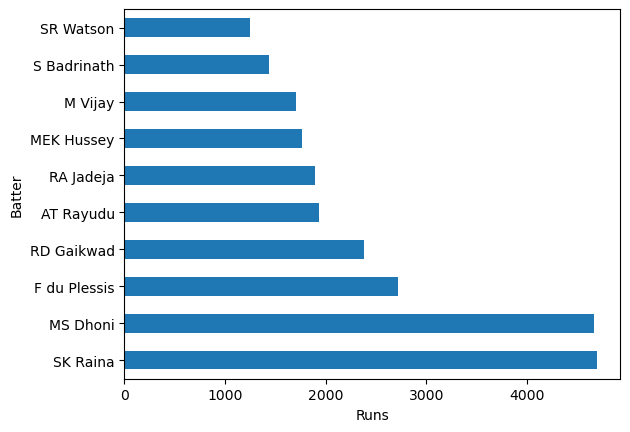

In [50]:
dfcsk.groupby(['Batter'])['BatsmanRun'].sum().sort_values(ascending = False).head(10).plot(kind ='barh')
plt.xlabel('Runs')
plt.show()
# MS Dhoni is the second highest run getter for CSK (2008-2024) *exculding 2016-17 as he was in RPSG

In [51]:
# Creating a mini aggregated data frame to calculate runs scored by all CSK batsmen

In [52]:
cskdf1 = pd.DataFrame(dfcsk.groupby(dfcsk['Batter'])['BatsmanRun'].sum()).reset_index()

In [53]:
# Filtering the data to show data only for those batsmen who have scored more than 1000 runs

In [54]:
cskdf1 = cskdf1[cskdf1['BatsmanRun'] >= 1000]

In [55]:
# Resetting index of cskdf1

In [56]:
cskdf1.reset_index(inplace = True, drop = True)

In [57]:
# Creating a mini aggregated data frame to calculate balls faced by all CSK batsmen

In [58]:
cskdf2 = pd.DataFrame(dfcsk.groupby(dfcsk['Batter'])['ball'].count()).reset_index()

In [59]:
# Merging msd_cskdf1 and msd_cskdf2

In [60]:
cskdfm = cskdf1.merge(cskdf2, on = 'Batter', how = 'left')

In [61]:
# Restting index of cskdfm

In [62]:
cskdfm.reset_index(inplace = True, drop = True)

In [63]:
# Adding a new column to cskdfm for Strike rate

In [64]:
cskdfm['Strike_rate'] = 100 * cskdfm['BatsmanRun']/cskdfm['ball']

In [65]:
# Restting the index of cskdfm

In [66]:
cskdfm.reset_index(inplace = True, drop = True)

In [67]:
# Plotting a scatter plot of SR vs Runs of CSK batsmen who have scored more than 1000 runs

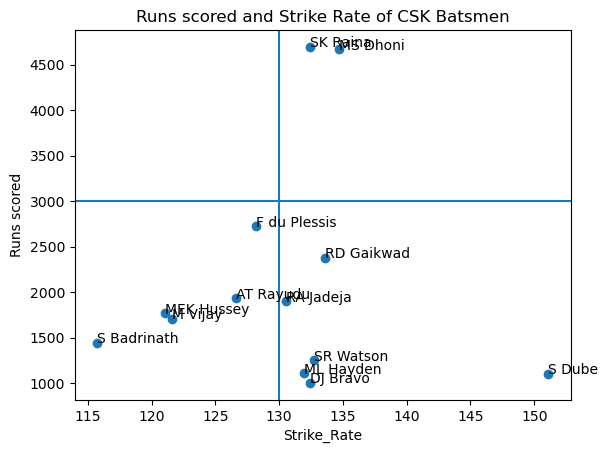

In [68]:
plt.scatter(cskdfm['Strike_rate'], cskdfm['BatsmanRun'])

for i in range(len(cskdfm)):

    plt.text(cskdfm['Strike_rate'][i], cskdfm['BatsmanRun'][i], cskdfm['Batter'][i])

plt.title('Runs scored and Strike Rate of CSK Batsmen')
plt.xlabel('Strike_Rate')
plt.axvline(130)
plt.axhline(3000)
plt.ylabel('Runs scored')
plt.show()
# MS Dhoni is in the top right quadrant with high runs and high strike rate for CSK (2008-2024)

In [69]:
# Plotting a horizontal bar graph of Runs scored by top 10 batsmen through out the IPL

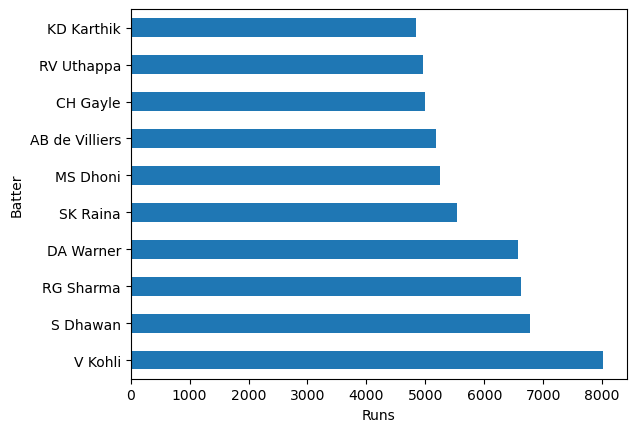

In [70]:
dfc1.groupby(['Batter'])['BatsmanRun'].sum().sort_values(ascending = False).head(10).plot(kind ='barh')
plt.xlabel('Runs')
plt.show()
# MS Dhoni is the 6th highest run scorer in IPL(2008-2024) among all teams

In [71]:
# Creating a mini aggregated data frame to calculate runs scored by all batsmen in IPL

In [72]:
df1 = pd.DataFrame(dfc1.groupby(dfc1['Batter'])['BatsmanRun'].sum()).reset_index()

In [73]:
# Sorting the data frame in descending order of runs scored

In [74]:
df1 = df1.sort_values('BatsmanRun', ascending = False)

In [75]:
# Checking the dataframe and assigning it top 25 batsmen's data

In [76]:
df1 = df1.head(25)

In [77]:
# Creating a mini aggregated data frame to calculate balls faced by all batsmen in IPL

In [78]:
df2 = pd.DataFrame(dfc1.groupby(dfc1['Batter'])['ball'].count()).reset_index()

In [79]:
# Sorting the data frame in descending order of balls faced

In [80]:
df2 = df2.sort_values('ball', ascending = False)

In [81]:
# Merging df1, df2

In [82]:
dfm = df1.merge(df2, on = 'Batter', how = 'left')

In [83]:
# Adding a new column to dfm for Strike rate

In [84]:
dfm['Strike_rate'] = 100 * dfm['BatsmanRun']/dfm['ball']

In [85]:
# Plotting a scatter plot of SR vs Runs of top 25 IPL batsmen

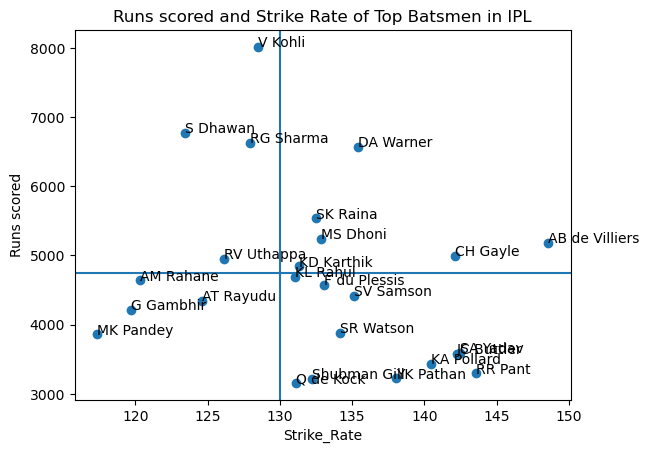

In [86]:
plt.scatter(dfm['Strike_rate'], dfm['BatsmanRun'])

for i in range(len(dfm)):

    plt.text(dfm['Strike_rate'][i], dfm['BatsmanRun'][i], dfm['Batter'][i])

plt.title('Runs scored and Strike Rate of Top Batsmen in IPL')
plt.xlabel('Strike_Rate')
plt.axvline(130)
plt.axhline(4750)
plt.ylabel('Runs scored')
plt.show()
# MS Dhoni is in the top right quadrant with highest runs and highest strike rate in IPL(2008-2024) among all teams

In [87]:
# Plotting a vertical bar graph of Year wise runs scored by MSD in IPL

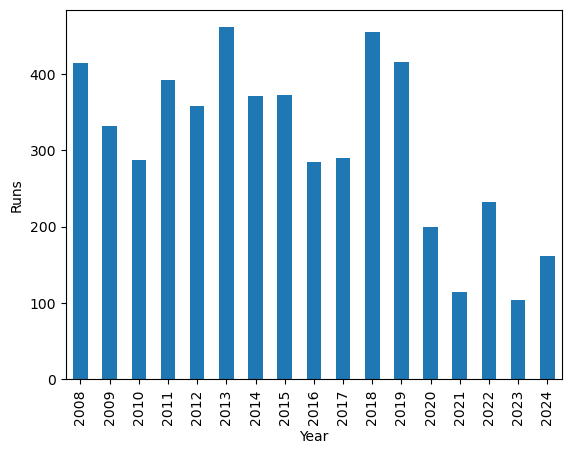

In [88]:
dhoni_df.groupby(['Year'])['BatsmanRun'].sum().plot(kind ='bar')
plt.ylabel('Runs')
plt.show()
# Year wise runs scored by MS Dhoni in IPL(2008-2024)
# Runs scored in the last 5 seasons are less than seasons from (2008-2013) & (20014-2020) which is concerning

In [89]:
# Plotting a vertical bar graph of Year wise dismissals of MSD in IPL

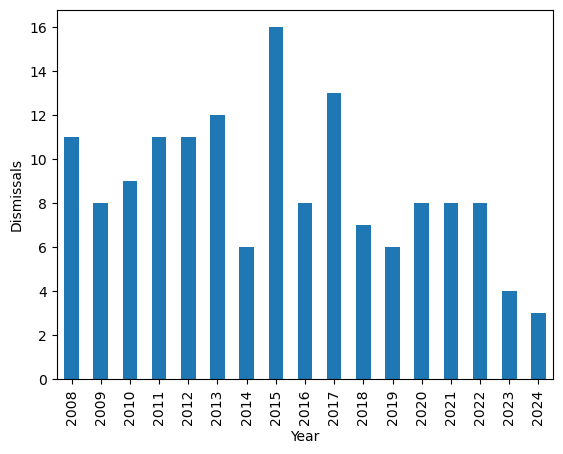

In [90]:
dhoni_df.groupby(['Year'])['PlayerOut'].count().plot(kind ='bar')
plt.ylabel('Dismissals')
plt.show()
# Year wise number of times MS Dhoni was dismmised in IPL (2008-2024)

In [91]:
# Plotting a vertical bar graph of Year wise balls faced by MSD in IPL

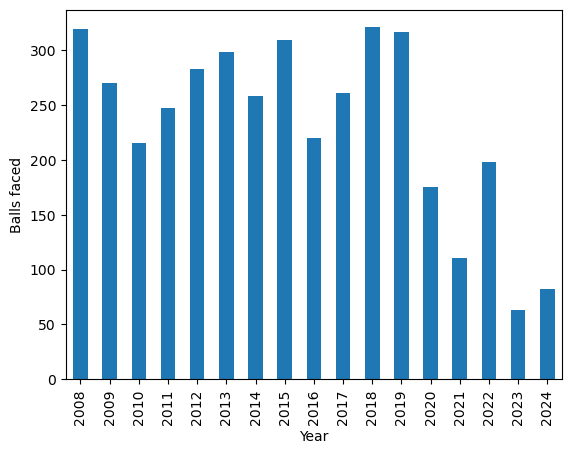

In [92]:
dhoni_df.groupby(['Year'])['ball'].count().plot(kind ='bar')
plt.ylabel('Balls faced')
plt.show()
# Year wise balls faced by MS Dhoni Iin IPL(2008-2024)
# MS Dhoni is Facing less balls from the last 5 years as compared with (2008-2013) & (2014-2020) which is not good

In [93]:
# creating a dataframe for 4s scored by Dhoni

In [94]:
dhoni_df4 = dhoni_df[dhoni_df['BatsmanRun'] == 4]

In [95]:
# Plotting a vertical bar graph of Year wise 4s scored by MSD in IPL

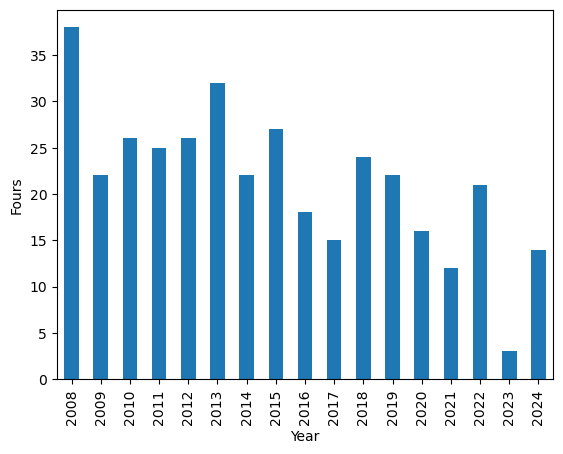

In [96]:
dhoni_df4.groupby(['Year'])['ball'].count().plot(kind ='bar')
plt.ylabel('Fours')
plt.show()
# Year wise 4s scored by MS Dhoni
# MS Dhoni hit fewer fours on an average in the last 5 seasons compared to earlier seasons

In [97]:
# creating a dataframe for 6s scored by Dhoni

In [98]:
dhoni_df6 = dhoni_df[dhoni_df['BatsmanRun'] == 6]

In [99]:
# Plotting a vertical bar graph of Year wise 6s scored by MSD in IPL

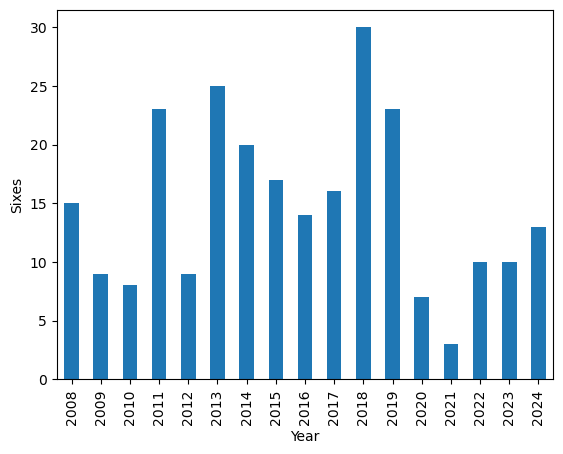

In [100]:
dhoni_df6.groupby(['Year'])['ball'].count().plot(kind ='bar')
plt.ylabel('Sixes')
plt.show()
# Season wise 6s scored by MS Dhoni in IPL(2008-2024)
# MS has scored less than 10 6s in the last 4 seasons which is concerning but has improved in 2024 scoring more than 10 sixes

In [101]:
# Creating CSK dataframe for first 6 seasons (2008-2013)

In [102]:
cskf6 = dfcsk[(dfcsk['Year'] >= 2008) & (dfcsk['Year'] <= 2013)]

In [103]:
# Plotting a horizontal bar graph of Runs scored by top ten CSK batsmen in the first 6 seasons

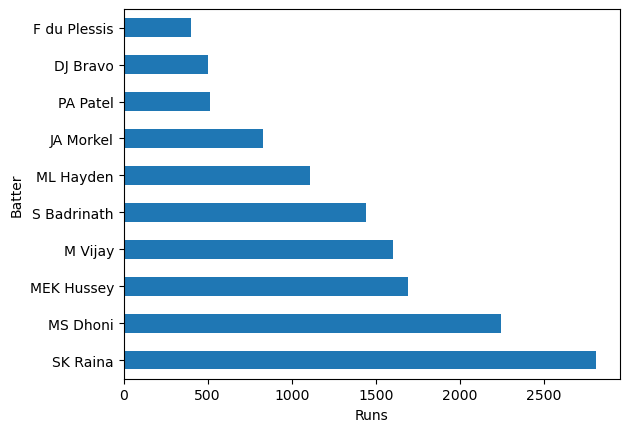

In [104]:
cskf6.groupby(['Batter'])['BatsmanRun'].sum().sort_values(ascending = False).head(10).plot(kind ='barh')
plt.xlabel('Runs')
plt.show()
# MS Dhoni has been the second highest run getter for CSK from (2008-2013)

In [105]:
# Creating a mini aggregated data frame to calculate runs scored by CSK batsmen in first 6 seasons

In [106]:
cskf61 = pd.DataFrame(cskf6.groupby(cskf6['Batter'])['BatsmanRun'].sum()).reset_index()

In [107]:
# Filtering the dataframe to show runs scored by top 10 CSK batsmen

In [108]:
cskf61 = cskf61.sort_values('BatsmanRun', ascending = False).head(10)

In [109]:
# Creating a mini aggregated data frame to calculate balls faced by CSK batsmen in first 6 seasons

In [110]:
cskf62 = pd.DataFrame(cskf6.groupby(cskf6['Batter'])['ball'].count()).reset_index()

In [111]:
# Merging cskf61, cskf62

In [112]:
cskf6m = cskf61.merge(cskf62, on = 'Batter', how = 'left')

In [113]:
# Adding a new column to cskf6m for Strike rate

In [114]:
cskf6m['Strike_rate'] = 100 * cskf6m['BatsmanRun']/ cskf6m['ball']

In [115]:
cskf6m.head()
# MS Dhoni had the second highest strike rate of 137.5 for CSK (2008-2013)

,Batter,BatsmanRun,ball,Strike_rate
0,SK Raina,2810,2049,137.140068
1,MS Dhoni,2244,1632,137.500000
2,MEK Hussey,1691,1388,121.829971
3,M Vijay,1600,1289,124.127230
4,S Badrinath,1441,1245,115.742972


In [116]:
# Plotting a scatter plot of SR vs Runs scored by top ten CSK batsmen in the first 6 seasons

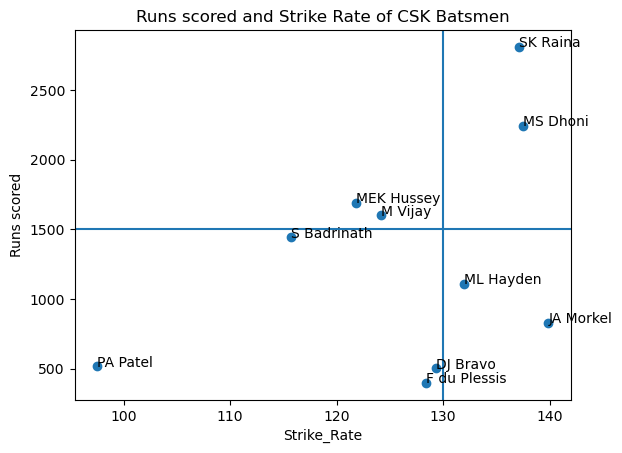

In [117]:
plt.scatter(cskf6m['Strike_rate'], cskf6m['BatsmanRun'])

for i in range(len(cskf6m)):

    plt.text(cskf6m['Strike_rate'][i], cskf6m['BatsmanRun'][i], cskf6m['Batter'][i])

plt.title('Runs scored and Strike Rate of CSK Batsmen')
plt.xlabel('Strike_Rate')
plt.axvline(130)
plt.axhline(1500)
plt.ylabel('Runs scored')
plt.show()
# MS Dhoni was in the top right quadrant with highest runs and highest SR for CSK (2008-2013)

In [118]:
# Creating CSK dataframe for next 6 seasons (2014-2019)

In [119]:
cskn6 = dfcsk[(dfcsk['Year'] >= 2014) & (dfcsk['Year'] <= 2019)]

In [120]:
# Plotting a horizontal bar graph of Runs scored by top ten CSK batsmen in the next 6 seasons

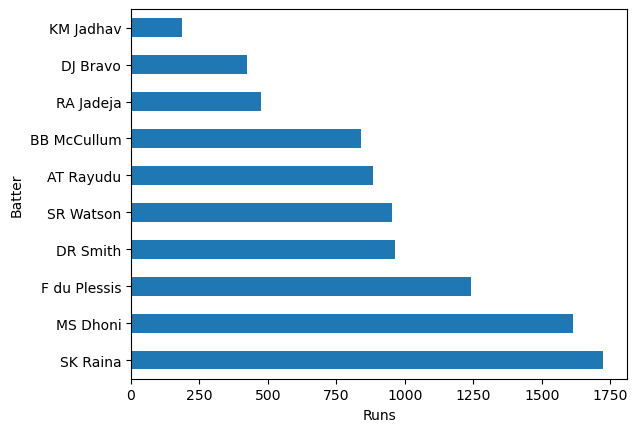

In [121]:
cskn6.groupby(['Batter'])['BatsmanRun'].sum().sort_values(ascending = False).head(10).plot(kind ='barh')
plt.xlabel('Runs')
plt.show()
# MS Dhoni was still the second highest run getter for CSK (2014-2019) *excluding 2016-2017 as he was in RPSG

In [122]:
# Creating a mini aggregated data frame to calculate runs scored by CSK batsmen in next 6 seasons

In [123]:
cskn61 = pd.DataFrame(cskn6.groupby(cskn6['Batter'])['BatsmanRun'].sum()).reset_index()

In [124]:
# Filtering the dataframe to show runs scored by top 10 CSK batsmen

In [125]:
cskn61 = cskn61.sort_values('BatsmanRun', ascending = False).head(10)

In [126]:
# Creating a mini aggregated data frame to calculate balls faced by CSK batsmen in next 6 seasons

In [127]:
cskn62 = pd.DataFrame(cskn6.groupby(cskn6['Batter'])['ball'].count()).reset_index()

In [128]:
# Merging cskf61, cskf62

In [129]:
cskn6m = cskn61.merge(cskn62, on = 'Batter', how = 'left')

In [130]:
# Adding a new column to cskn6m for Strike rate

In [131]:
cskn6m['Strike_rate'] = 100 * cskn6m['BatsmanRun']/ cskn6m['ball']

In [132]:
cskn6m.head()
# MS Dhoni's SR has decreased from 137.5 in (2008-2013) to 134 in (2014-2019) but still has the 2nd highest SR for CSK

,Batter,BatsmanRun,ball,Strike_rate
0,SK Raina,1725,1364,126.466276
1,MS Dhoni,1614,1205,133.941909
2,F du Plessis,1241,1013,122.507404
3,DR Smith,965,766,125.979112
4,SR Watson,953,689,138.316401


In [133]:
# Plotting a scatter plot of SR vs Runs scored by top ten CSK batsmen in the next 6 seasons

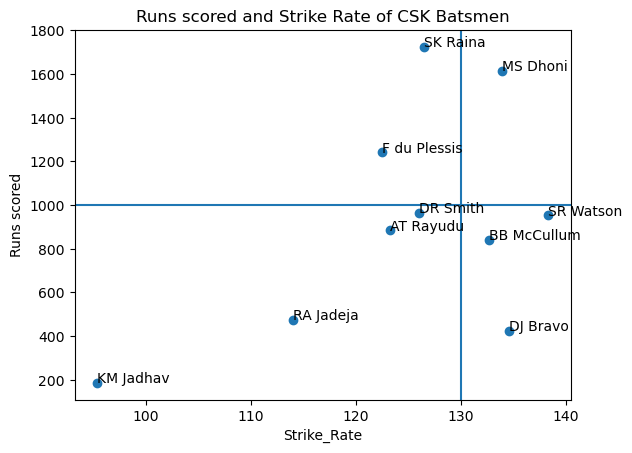

In [134]:
plt.scatter(cskn6m['Strike_rate'], cskn6m['BatsmanRun'])

for i in range(len(cskn6m)):

    plt.text(cskn6m['Strike_rate'][i], cskn6m['BatsmanRun'][i], cskn6m['Batter'][i])

plt.title('Runs scored and Strike Rate of CSK Batsmen')
plt.xlabel('Strike_Rate')
plt.axvline(130)
plt.axhline(1000)
plt.ylabel('Runs scored')
plt.show()
# MS Dhoni was still in the top right quadrant with highest runs and high SR for CSK (2014-2019)

In [135]:
# Creating a CSK dataframe for the last 5 seasons (2020 -2024)

In [136]:
cskl5 = dfcsk[(dfcsk['Year'] >= 2020) & (dfcsk['Year'] <= 2024)]

In [137]:
# Plotting a horizontal bar graph of Runs scored by top ten CSK batsmen in the last 5 seasons

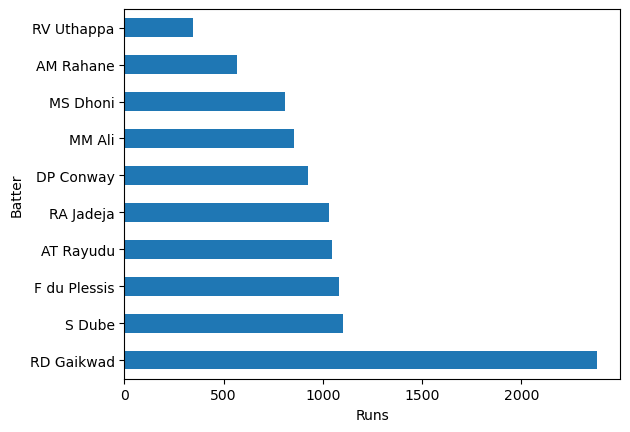

In [138]:
cskl5.groupby(['Batter'])['BatsmanRun'].sum().sort_values(ascending = False).head(10).plot(kind ='barh')
plt.xlabel('Runs')
plt.show()
# MS Dhoni is now the 8th highest run scorer for CSK since the last 5 years (2020-2024)

In [139]:
# Creating a mini aggregated data frame to calculate runs scored by CSK batsmen in last 5 seasons

In [140]:
cskl51 = pd.DataFrame(cskl5.groupby(cskl5['Batter'])['BatsmanRun'].sum()).reset_index()

In [141]:
# Filtering the dataframe to show runs scored by top 10 CSK batsmen

In [142]:
cskl51 = cskl51.sort_values('BatsmanRun', ascending = False).head(10)

In [143]:
# Creating a mini aggregated data frame to calculate balls faced by CSK batsmen in last 5 seasons

In [144]:
cskl52 = pd.DataFrame(cskl5.groupby(cskl5['Batter'])['ball'].count()).reset_index()

In [145]:
# Merging cskl51, cskl52

In [146]:
cskl5m = cskl51.merge(cskl52, on = 'Batter', how = 'left')

In [147]:
# Adding a new column to cskl5m for Strike rate

In [148]:
cskl5m['Strike_rate'] = 100 * cskl5m['BatsmanRun']/cskl5m['ball']

In [149]:
cskl5m
# However from (2020-2024) MS is the 8th Highest Run Scorer for CSK
# Cleary shows that MS Dhoni is scoring less runs than usual
# and his SR for CSK has also decreased from 134 in (2014-2019) to 129 in (2020-2024)
# thus showing that his batting is becoming less effective

,Batter,BatsmanRun,ball,Strike_rate
0,RD Gaikwad,2380,1781,133.632791
1,S Dube,1103,730,151.095890
2,F du Plessis,1082,800,135.250000
3,AT Rayudu,1048,809,129.542645
4,RA Jadeja,1032,746,138.337802
5,DP Conway,924,669,138.116592
6,MM Ali,853,650,131.230769
7,MS Dhoni,811,629,128.934817
8,AM Rahane,568,393,144.529262
9,RV Uthappa,345,267,129.213483


In [150]:
# Plotting a scatter plot of SR vs Runs scored by top ten CSK batsmen in the last 5 seasons

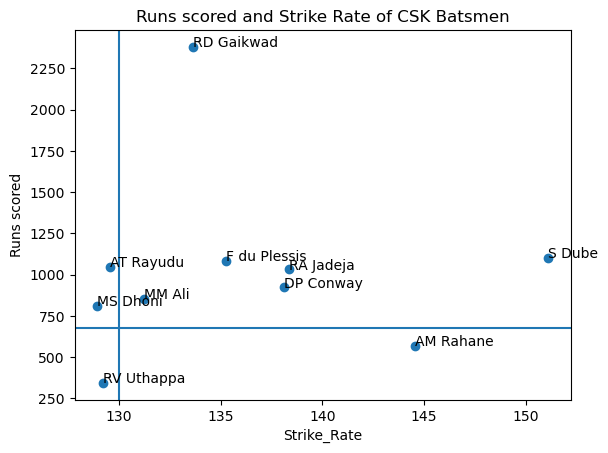

In [151]:
plt.scatter(cskl5m['Strike_rate'], cskl5m['BatsmanRun'])

for i in range(len(cskl5m)):

    plt.text(cskl5m['Strike_rate'][i], cskl5m['BatsmanRun'][i], cskl5m['Batter'][i])

plt.title('Runs scored and Strike Rate of CSK Batsmen')
plt.xlabel('Strike_Rate')
plt.axvline(130)
plt.axhline(675)
plt.ylabel('Runs scored')
plt.show()
# Moreover, MS Dhoni has now shifted to the bottom of the top left quadrant with least runs and least SR for CSK(2020-2024)

In [152]:
# Creating IPL dataframe for first 6 years (2008-2013)

In [153]:
dff6 = dfc1[(dfc1['Year'] >= 2008) & (dfc1['Year'] <= 2013)]

In [154]:
# Plotting a horizontal bar graph of Runs scored by top ten IPL batsmen in the first 6 seasons

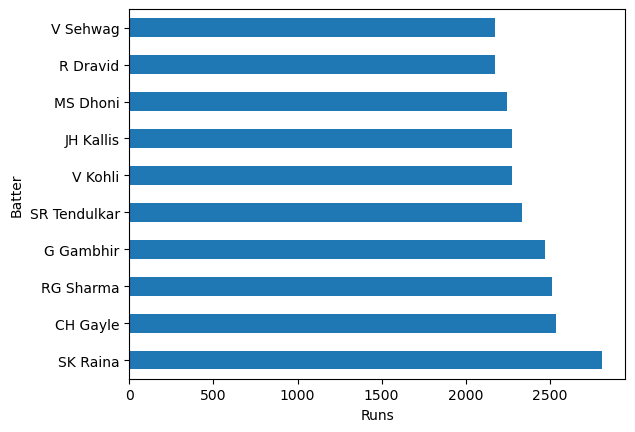

In [155]:
dff6.groupby(['Batter'])['BatsmanRun'].sum().sort_values(ascending = False).head(10).plot(kind ='barh')
plt.xlabel('Runs')
plt.show()
# MS Dhoni was the 8th highest run scorer in the first 6 seasons of IPL (2008-2013)

In [156]:
# Creating a mini aggregated data frame to calculate runs scored by IPL batsmen in first 6 seasons

In [157]:
dff61 = pd.DataFrame(dff6.groupby(dff6['Batter'])['BatsmanRun'].sum()).reset_index()

In [158]:
# Filtering the dataframe to show runs scored by top 30 batsmen

In [159]:
dff61 = dff61.sort_values('BatsmanRun', ascending = False).head(30)

In [160]:
# Creating a mini aggregated data frame to calculate balls faced by IPL batsmen in first 6 seasons

In [161]:
dff62 = pd.DataFrame(dff6.groupby(dff6['Batter'])['ball'].count()).reset_index()

In [162]:
# Merging dff61, dff62

In [163]:
dff6m = dff61.merge(dff62, on ='Batter', how = 'left')

In [164]:
# Adding a new column to dff6m for Strike rate

In [165]:
dff6m['Strike_rate'] = 100 * dff6m['BatsmanRun']/dff6m['ball']

In [166]:
dff6m.head(10)
# MS Dhoni had SR of 138 in the first 6 seasons of IPL (2008-2013)

,Batter,BatsmanRun,ball,Strike_rate
0,SK Raina,2810,2049,137.140068
1,CH Gayle,2537,1654,153.385732
2,RG Sharma,2513,1978,127.047523
3,G Gambhir,2471,2015,122.630273
4,SR Tendulkar,2334,2044,114.187867
5,V Kohli,2278,1886,120.784730
6,JH Kallis,2276,2160,105.370370
7,MS Dhoni,2244,1632,137.500000
8,R Dravid,2174,1918,113.347237
9,V Sehwag,2174,1410,154.184397


In [167]:
# Plotting a scatter plot of SR vs Runs scored by top 30 IPL batsmen in the first 6 seasons

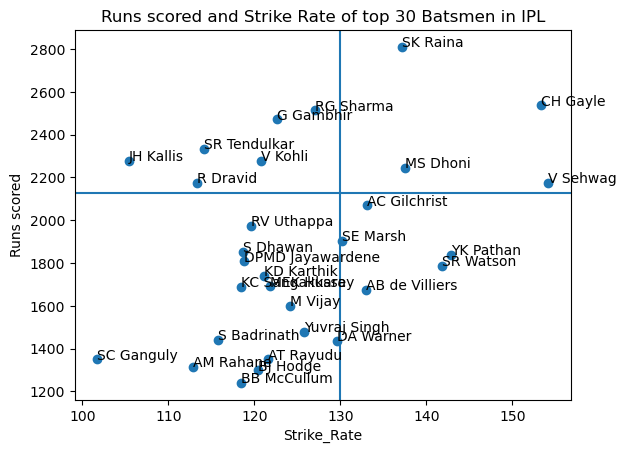

In [168]:
plt.scatter(dff6m['Strike_rate'], dff6m['BatsmanRun'])

for i in range(len(dff6m)):

    plt.text(dff6m['Strike_rate'][i], dff6m['BatsmanRun'][i], dff6m['Batter'][i])

plt.title('Runs scored and Strike Rate of top 30 Batsmen in IPL')
plt.xlabel('Strike_Rate')
plt.axvline(130)
plt.axhline(2125)
plt.ylabel('Runs scored')
plt.show()
# MS Dhoni was in the top right quadrant in IPL (2008-2013) having highest runs and highest SR

In [169]:
# Creating IPL dataframe for next 6 years (2014-2020)

In [170]:
dfn6 = dfc1[(dfc1['Year'] >= 2014) & (dfc1['Year'] <= 2019)]

In [171]:
# Plotting a horizontal bar graph of Runs scored by top ten IPL batsmen in the next 6 seasons

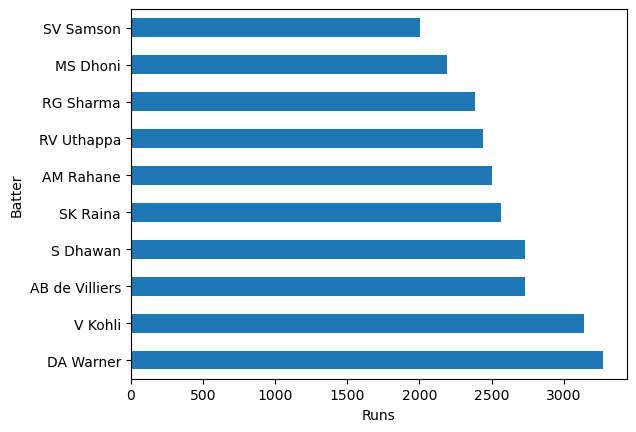

In [172]:
dfn6.groupby(['Batter'])['BatsmanRun'].sum().sort_values(ascending = False).head(10).plot(kind ='barh')
plt.xlabel('Runs')
plt.show()
# MS Dhoni was the 9th highest run scorer the next 6 seasons of IPL(2014-2019)

In [173]:
# Creating a mini aggregated data frame to calculate runs scored by top 30 IPL batsmen in next 6 seasons

In [174]:
dfn61 = pd.DataFrame(dfn6.groupby(dfn6['Batter'])['BatsmanRun'].sum()).reset_index()

In [175]:
# Filtering the dataframe to show runs scored by top 30 batsmen

In [176]:
dfn61 = dfn61.sort_values('BatsmanRun', ascending = False).head(30)

In [177]:
# Creating a mini aggregated data frame to calculate balls faced by top 30 IPL batsmen in next 6 seasons

In [178]:
dfn62 = pd.DataFrame(dfn6.groupby(dfn6['Batter'])['ball'].count()).reset_index()

In [179]:
# Merging dfn61, dfn62

In [180]:
dfn6m = dfn61.merge(dfn62, on ='Batter', how = 'left')

In [181]:
# Adding a new column to dfn6m for Strike rate

In [182]:
dfn6m['Strike_rate'] = 100 * dfn6m['BatsmanRun']/dfn6m['ball']

In [183]:
dfn6m.head(10)
# MS Dhoni's SR fell slightly from 138 in the first 6 seasons to 130 in the next 6 seasons of IPL(2014-2019)

,Batter,BatsmanRun,ball,Strike_rate
0,DA Warner,3271,2291,142.776080
1,V Kohli,3139,2325,135.010753
2,AB de Villiers,2733,1717,159.172976
3,S Dhawan,2728,2216,123.104693
4,SK Raina,2566,1995,128.621554
5,AM Rahane,2504,2046,122.385142
6,RV Uthappa,2441,1841,132.590983
7,RG Sharma,2385,1838,129.760609
8,MS Dhoni,2188,1686,129.774614
9,SV Samson,2003,1549,129.309232


In [184]:
# Plotting a scatter plot of SR vs Runs scored by top 30 IPL batsmen in the next 6 seasons

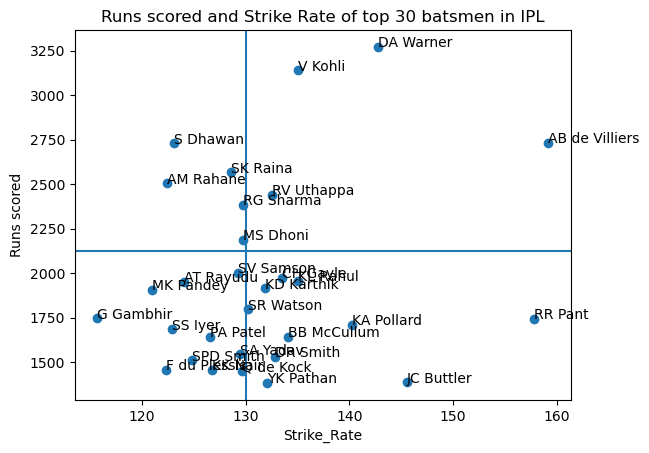

In [185]:
plt.scatter(dfn6m['Strike_rate'], dfn6m['BatsmanRun'])

for i in range(len(dfn6m)):

    plt.text(dfn6m['Strike_rate'][i], dfn6m['BatsmanRun'][i], dfn6m['Batter'][i])

plt.title('Runs scored and Strike Rate of top 30 batsmen in IPL')
plt.xlabel('Strike_Rate')
plt.axvline(130)
plt.axhline(2125)
plt.ylabel('Runs scored')
plt.show()
# MS Dhoni shifted to the top left quadrant in the next 6 seasons scoring fewer than usual runs with lesser SR (130)

In [186]:
# Creating an IPL dataframe for last 5 years (2020-2024)

In [187]:
dfl5 = dfc1[(dfc1['Year'] >= 2020) & (dfc1['Year'] <= 2024)]

In [188]:
# Plotting a horizontal bar graph of Runs scored by top 30 IPL batsmen in the last 5 seasons

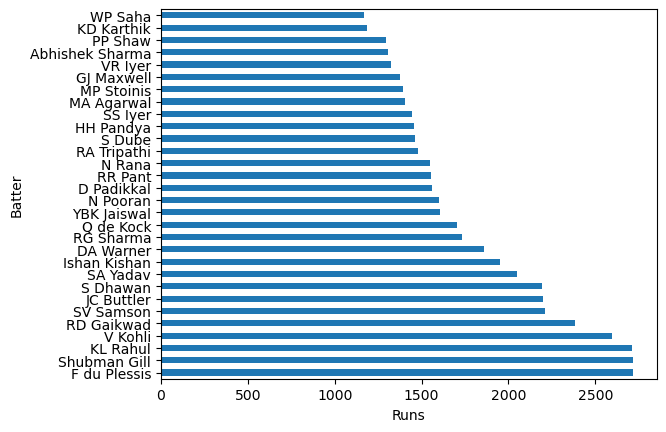

In [189]:
dfl5.groupby(['Batter'])['BatsmanRun'].sum().sort_values(ascending = False).head(30).plot(kind ='barh')
plt.xlabel('Runs')
plt.show()
# MS Dhoni is not even in the top 30 run scorers from the last 5 seasons (2020-2024) which is worrisome

In [190]:
# Creating a mini aggregated data frame to calculate runs scored by top 55 IPL batsmen in last 5 seasons

In [191]:
dfl51 = pd.DataFrame(dfl5.groupby(dfl5['Batter'])['BatsmanRun'].sum()).reset_index()

In [192]:
# Filtering the dataframe to show runs scored by top 55 batsmen

In [193]:
dfl51 = dfl51.sort_values('BatsmanRun',ascending = False).head(55)

In [194]:
# Creating a mini aggregated data frame to calculate balls faced by top 55 IPL batsmen in last 5 seasons

In [195]:
dfl52 = pd.DataFrame(dfl5.groupby(dfl5['Batter'])['ball'].count()).reset_index()

In [196]:
# Merging dfl51, dfl52

In [197]:
dfl5m = dfl51.merge(dfl52, on='Batter', how ='left')

In [198]:
# Adding a new column to dfl5m for Strike rate

In [199]:
dfl5m['Strike_rate'] = 100 * dfl5m['BatsmanRun']/dfl5m['ball']

In [200]:
dfl5m
# MS Dhoni is now placed 51st among the highest run scorers in IPL

,Batter,BatsmanRun,ball,Strike_rate
0,F du Plessis,2718,1936,140.392562
1,Shubman Gill,2717,2048,132.666016
2,KL Rahul,2712,2113,128.348320
3,V Kohli,2597,2025,128.246914
4,RD Gaikwad,2380,1781,133.632791
5,SV Samson,2210,1542,143.320363
6,JC Buttler,2196,1566,140.229885
7,S Dhawan,2190,1708,128.220141
8,SA Yadav,2050,1325,154.716981
9,Ishan Kishan,1949,1445,134.878893


In [201]:
# Plotting a scatter plot of SR vs Runs scored by top 55 IPL batsmen in the last 5 seasons

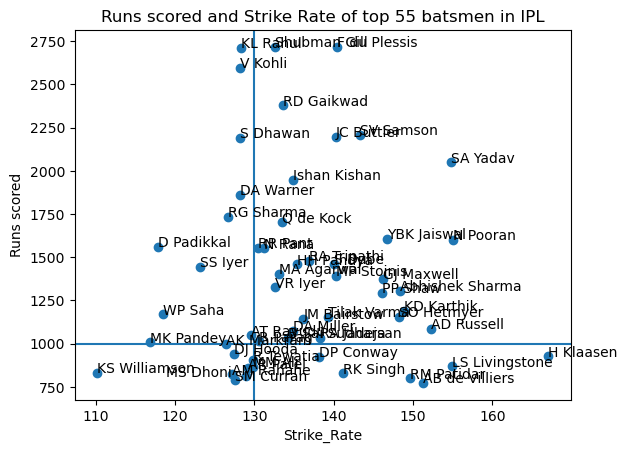

In [202]:
plt.scatter(dfl5m['Strike_rate'], dfl5m['BatsmanRun'])

for i in range(len(dfl5m)):
    if(dfl5m['Batter'][i] == 'MS Dhoni'):
       plt.text(dfl5m['Strike_rate'][i]-10, dfl5m['BatsmanRun'][i], dfl5m['Batter'][i])
    else:
       plt.text(dfl5m['Strike_rate'][i], dfl5m['BatsmanRun'][i], dfl5m['Batter'][i])

plt.title('Runs scored and Strike Rate of top 55 batsmen in IPL')
plt.xlabel('Strike_Rate')
plt.axvline(130)
plt.axhline(1000)
plt.ylabel('Runs scored')
plt.show()
# MS Dhoni has now shifted to the bottom left quadrant with least runs and least SR from the last 5 seasons (2020-2024)

In [203]:
# (2008-2013)
# MS Dhoni was the second highest run getter for CSK from (2008-2013)
# MS Dhoni had the second highest strike rate of 138 for CSK (2008-2013)
# MS Dhoni was in the top right quadrant with highest runs and highest SR for CSK (2008-2013)
# MS Dhoni was the 8th highest run scorer in the first 6 seasons of IPL (2008-2013)
# MS Dhoni had SR of 138 in the first 6 seasons of IPL (2008-2013)
# MS Dhoni was in the top right quadrant in IPL (2008-2013) having highest runs and highest SR
#---------------------------------------------------------------------------------------------------------------------
# (2014-2019)
# MS Dhoni was still the second highest run getter for CSK (2014-2019)
# MS Dhoni's SR has decreased from 138 in (2008-2013) to 134 in (2014-2019) but still has the 2nd highest SR for CSK
# MS Dhoni was still in the top right quadrant with highest runs and high SR for CSK (2014-2019)
# MS Dhoni was the 9th highest run scorer the next 6 seasons of IPL(2014-2019)
# MS Dhoni's SR fell slightly from 138 in the first 6 seasons to 130 in the next 6 seasons of IPL(2014-2019)
# MS Dhoni shifted to the top left quadrant in the next 6 seasons scoring fewer than usual runs with lesser SR (130)
#----------------------------------------------------------------------------------------------------------------------
# (2020-2024)
# However from (2020-2024) MS is the 6th Highest Run Scorer for CSK
# Cleary shows that MS Dhoni is scoring less runs than usual
# and his SR for CSK has also decreased from 134 in (2014-2019) to 129 in (2020-2024)
# thus showing that his batting is becoming less effective
# Moreover, MS Dhoni has now shifted to the bottom of the top left quadrant with least runs and least SR for CSK(2020-2024)
# MS Dhoni is not even in the top 30 run scorers from the last 5 seasons (2020-2024) which is worrisome
# MS Dhoni is now placed 51st among the highest run scorers in IPL
# MS Dhoni has now shifted to the bottom left quadrant with least runs and least SR from the last 5 seasons (2020-2024)
#------------------------------------------------------------------------------------------------------------------------

# Thus from above facts we can conclude that the mighty MS Dhoni who has been a dangerous, swashbuckling batsman
# who used to promote himself to the top of the batting order
# scoring mamoth of runs with a SR of 130 and above from 2008-2020 is now not much effective as he was
# and should consider to retire if his overall SR falls below 100. As he is also aging,
# the odds of this happening are more than ever in the coming year.
# Moreover he doesn't promote himself to the top of the order and thus faces fewer balls.
# Personally I think MS Dhoni must try opening for CSK in the next season and see the difference that could make.
# Eventually, he is going to retire soon as a legendary player and may take up the role of CSK's head coach or other team's coach.